# Figure 1C for the metapredict V3 manuscript 2024

In [1]:
import os
import metapredict as meta
import numpy as np
import matplotlib
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, precision_recall_curve
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'
# set fonts
font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

# set colors for plots here. Colors are for V1, v2, and v3. Chosen because Ryan can differentiate them.
v1color='#FF9D33'
v2color='#FF6433'
v3color='#CC2D46'
hybridcolor='black'
pLDDT_color='blue'


In [2]:
# data
# metapredict V1 predictions done in series. metapredict=v1.2.
# modern dependencies!
LinuxCPU_V1=[55.0871319770813, 55.23338031768799, 55.17929291725159]
MBPCPU_V1 = [386.44398283958435, 390.9749960899353, 391.2345280647278]

# metapredict V3 using predict function. This uses batch functionality. Same dependencies.
LinuxCPU_V3= [56.746856689453125,57.01214289665222,56.64704132080078]
MBPCPU_V3=[96.44559574127197,97.909912109375, 97.6481659412384]
LinuxGPU_V3 = [4.074631929397583,4.1087486743927,4.0143585205078125]


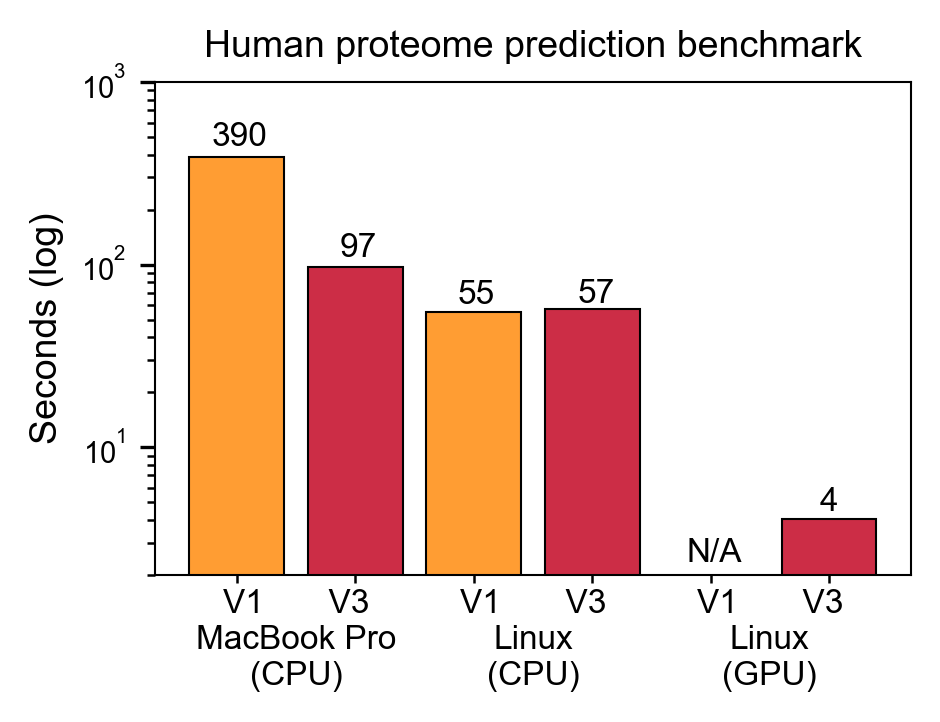

In [3]:
# Figure V1 v V3
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3.25, 2.5), dpi=150, facecolor='w', edgecolor='k')

# plot some bars
ax.bar('V1 MBP CPU', sum(MBPCPU_V1)/3, color=v1color, edgecolor='black', label='V1 MBP CPU', linewidth=0.5)
ax.bar('V3 MBP CPU', sum(MBPCPU_V3)/3, color=v3color, edgecolor='black', label='V3 MBP CPU', linewidth=0.5)

ax.bar('V1 Linux CPU', sum(LinuxCPU_V1)/3, color=v1color, edgecolor='black', label='V1 Linux CPU', linewidth=0.5)
ax.bar('V3 Linux CPU', sum(LinuxCPU_V3)/3, color=v3color, edgecolor='black', label='V3 Linux CPU', linewidth=0.5)

ax.bar('V1 GPU',0, color=v1color, edgecolor='black', label='V1 Linux GPU', linewidth=0)
ax.bar('V3 Linux GPU', sum(LinuxGPU_V3)/3, color=v3color, edgecolor='black', label='V3 Linux GPU', linewidth=0.5)

#ax.set_xticks([])
ax.set_xticks([0.5,2.5,4.5],['V1       V3\nMacBook Pro\n(CPU)', 'V1       V3\nLinux\n(CPU)', 'V1       V3\nLinux\n(GPU)'], fontsize=8)
ax.set_xticks([0,1,2,3,4,5], minor=True)
ax.tick_params(axis='x', which='major', length=0)
#ax.set_yticklabels([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000])

#plt.xticks(np.arange(0,len(n1)), n1, fontsize=8, rotation=70)
ax.set_ylabel('Seconds (log)',fontsize=9)
plt.title('Human proteome prediction benchmark', fontsize=9)
#ax.legend(loc='upper right', fontsize=7)

ax.set_yscale('log')
ax.set_ylim([2, 1000])
# change the fontsize
ax.tick_params(axis='y', labelsize=7)

# set text.
ax.text(-0.21,445,f'{round(sum(MBPCPU_V1)/3)}', fontsize=8)
ax.text(0.87,110,f'{round(sum(MBPCPU_V3)/3)}', fontsize=8)
ax.text(1.86,61,f'{round(sum(LinuxCPU_V1)/3)}', fontsize=8)
ax.text(2.88,62,f'{round(sum(LinuxCPU_V3)/3)}', fontsize=8)
ax.text(3.8,2.35,'N/A', fontsize=8)
ax.text(4.92,4.5,f'{round(sum(LinuxGPU_V3)/3)}', fontsize=8)
#ax.set_title('Comparing Speed Across Networks', fontsize=9)
plt.tight_layout()
plt.savefig('Figure_1_D.pdf')
